In [2]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pycourse_lesson3_4_scripts as us
import scipy.stats as stat
from copy import deepcopy


ImportError: No module named 'pycourse_lesson3_4_scripts'

In [4]:
# Now for something completely different
jnk = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
hcols = jnk.columns[-6:]
hdf = jnk[hcols]
hdf.columns = ['Cluster 1: Partial Volume',
              'Cluster 2: Dorsal Cortex',
               'Cluster 3: Medial/Inferior Temporal',
              'Cluster 4: Subcortical/Occiptial',
              'Cluster 5: Temporoparietal',
              'Cluster 6: Frontal Cortex']

In [7]:
sns.set_style('white')

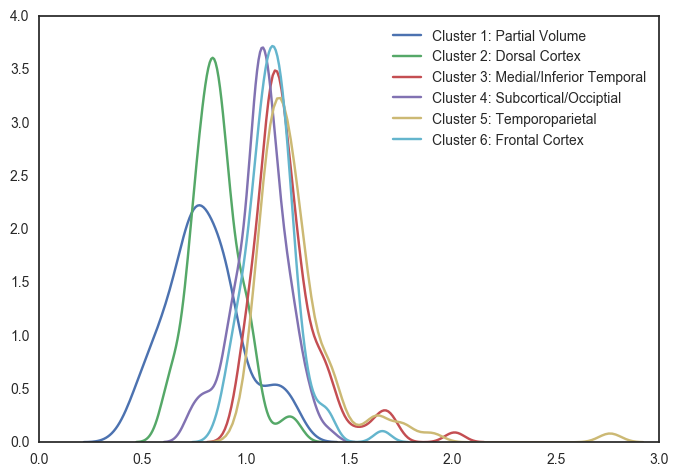

In [7]:
for col in hdf.columns:
    sns.kdeplot(hdf[col])
sns.plt.legend()
plt.show()
#plt.savefig('/Users/jakevogel/Dropbox/tmp/tau/checking_solutions/n89_libmask/histys.pdf',
#           bbox_inches='tight')

In [9]:
sheet = '/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/Tau_4d_basc/Jagust_Pipeline/tau_lit_for_mm_jakerois1.dat'
fig_df = pandas.read_csv(sheet)
fig_df.head()

,Column 1,RID,VISCODE,VISupdate,COLPROT,ORIGPROT,EXAMDATE,DX.bl,AGE,PTGENDER,...,n89_libmask_6,n89_libmask_core_1,n89_libmask_core_2,n89_libmask_core_3,n89_libmask_core_4,n89_libmask_core_5,n89_libmask_core_6,Predicted MMSE,SUVR group,SUVR Group 3
0,0,112,bl,0.0,ADNI1,ADNI1,02/01/2006,LMCI,70.6,Male,...,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968,28.496609,SUVR > 1.33,SUVR > 1.33
1,1,112,m06,6.0,ADNI1,ADNI1,07/27/2006,LMCI,70.6,Male,...,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968,28.385430,SUVR > 1.33,SUVR > 1.33
2,2,112,m12,12.0,ADNI1,ADNI1,02/07/2007,LMCI,70.6,Male,...,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968,28.274250,SUVR > 1.33,SUVR > 1.33
3,3,112,m18,18.0,ADNI1,ADNI1,07/30/2007,LMCI,70.6,Male,...,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968,28.163070,SUVR > 1.33,SUVR > 1.33
4,4,112,m24,24.0,ADNI1,ADNI1,01/29/2008,LMCI,70.6,Male,...,1.251616,0.583673,1.012536,1.294618,0.972136,1.40379,1.248968,28.051890,SUVR > 1.33,SUVR > 1.33


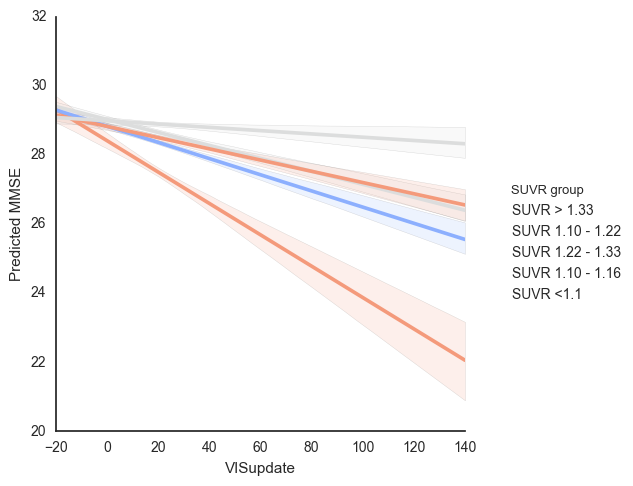

In [10]:
plt.close()
sns.lmplot('VISupdate','Predicted MMSE',data=fig_df,hue='SUVR group',markers=None,palette=sns.color_palette("coolwarm_r", 3))
plt.show()

In [4]:
ldf= pandas.ExcelFile('/Users/jakevogel/Science/tmp/tau/Lund/all_rois.xls').parse('Sheet1')
ldf.head()

,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,dkt_Braak_new_atlas_4.0,dkt_Braak_new_atlas_5.0,dkt_Braak_new_atlas_6.0,dkt_Braak_stage_1_1.0,dkt_Braak_stage_2_2.0,dkt_Braak_stage_3_3.0,dkt_Braak_stage_4_4.0,...,brain_partition_consensus_ind_adni_sci5_scf6_3.0,brain_partition_consensus_ind_adni_sci5_scf6_4.0,brain_partition_consensus_ind_adni_sci5_scf6_5.0,brain_partition_consensus_ind_adni_sci5_scf6_6.0,brain_partition_core_ind_adni_sci5_scf6_1.0,brain_partition_core_ind_adni_sci5_scf6_2.0,brain_partition_core_ind_adni_sci5_scf6_3.0,brain_partition_core_ind_adni_sci5_scf6_4.0,brain_partition_core_ind_adni_sci5_scf6_5.0,brain_partition_core_ind_adni_sci5_scf6_6.0
TAU-1003,1.344503,1.269826,1.193624,1.179140,1.097541,0.959840,1.344503,1.295521,1.219433,1.192488,...,0.951002,1.070457,1.008160,1.218381,1.070220,0.928672,1.219963,1.175770,1.309252,0.993202
TAU-1004,0.973466,1.060743,1.058470,1.105787,1.122726,1.076856,0.973466,1.030835,1.051487,1.087809,...,1.152479,1.082974,1.041744,1.205667,1.038627,1.119934,1.131683,0.898657,1.223319,1.015267
TauPET073,1.457483,0.958445,1.557190,1.271524,1.153455,1.079370,1.457483,1.129757,1.449019,1.330309,...,1.076179,1.120145,1.056275,1.311249,1.177129,0.985349,1.703557,0.846986,1.423650,0.993696
TauPET072,1.624871,0.947029,1.235772,1.173138,0.988347,0.844975,1.624871,1.179711,1.221597,1.189191,...,0.825994,0.927149,0.901747,1.212925,0.900223,0.859104,1.350582,0.966385,1.296943,0.886425
TauPET071,1.442212,0.882888,1.564595,1.578354,1.413542,1.272638,1.442212,1.074884,1.440660,1.532764,...,1.317589,1.362097,1.278453,1.764839,1.255020,1.257733,1.493175,0.877273,1.866951,1.281288


In [11]:
ldf.columns[-6:]

Index(['brain_partition_core_ind_adni_sci5_scf6_1.0',
       'brain_partition_core_ind_adni_sci5_scf6_2.0',
       'brain_partition_core_ind_adni_sci5_scf6_3.0',
       'brain_partition_core_ind_adni_sci5_scf6_4.0',
       'brain_partition_core_ind_adni_sci5_scf6_5.0',
       'brain_partition_core_ind_adni_sci5_scf6_6.0'],
      dtype='object')

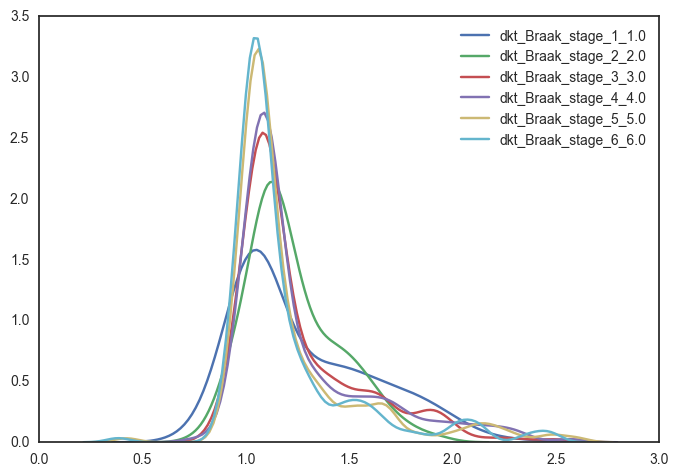

In [14]:
for col in ldf.columns[6:12]:
    sns.kdeplot(ldf[col])
sns.plt.legend()
plt.show()

In [18]:
jnk = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
jnk.columns[-38:-32]

Index(['dkt_Braak_stage_1_1.0', 'dkt_Braak_stage_2_2.0',
       'dkt_Braak_stage_3_3.0', 'dkt_Braak_stage_4_4.0',
       'dkt_Braak_stage_5_5.0', 'dkt_Braak_stage_6_6.0'],
      dtype='object')

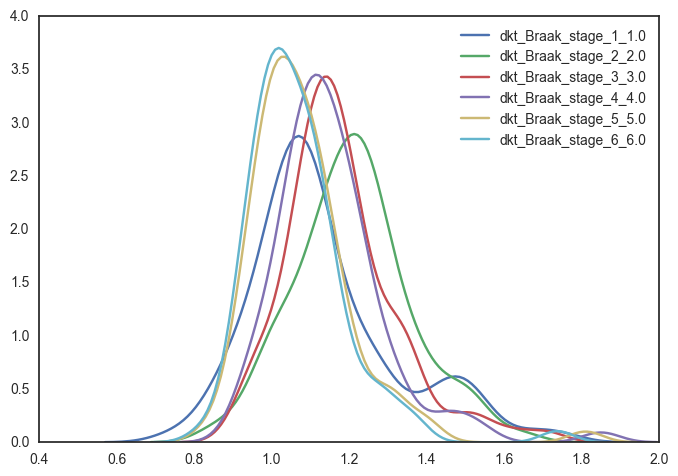

In [19]:
for col in jnk.columns[-38:-32]:
    sns.kdeplot(jnk[col])
sns.plt.legend()
plt.show()